In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [2]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [3]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    # plt.suptitle(face)
    for idx in range(len(emotion[emo])):
        target_list = [i['from'].replace('-',' - ') + " -> " + i['dest'].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx], palette="tab10")        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

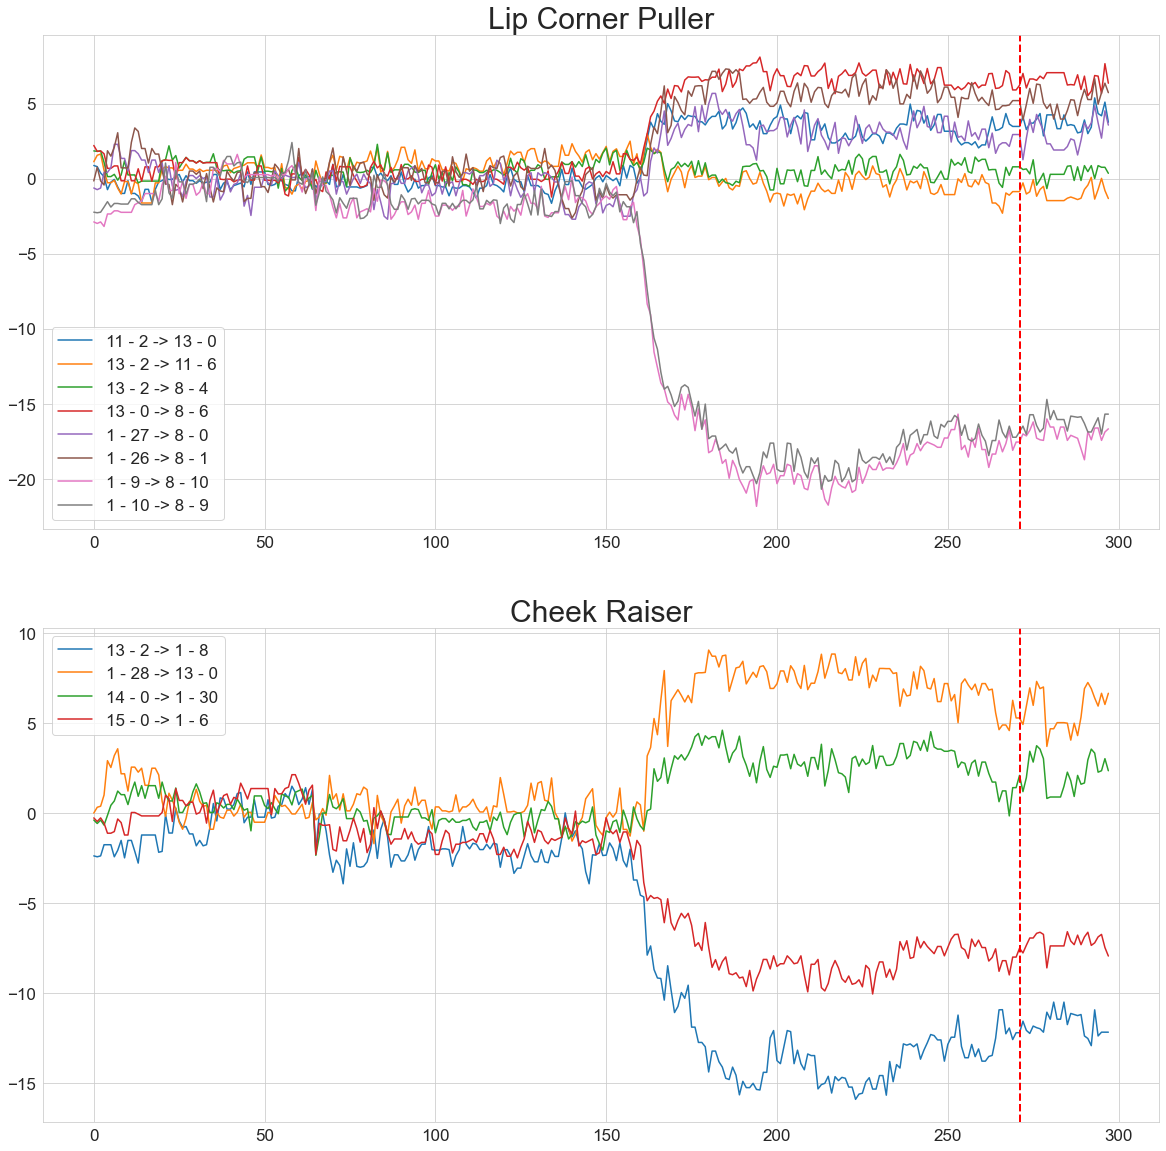

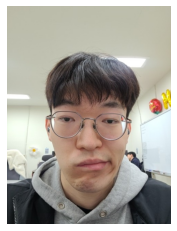

{'11 - 2 -> 13 - 0': 3.48, '13 - 2 -> 11 - 6': -0.86, '13 - 2 -> 8 - 4': 0.79, '13 - 0 -> 8 - 6': 6.22, '1 - 27 -> 8 - 0': 2.94, '1 - 26 -> 8 - 1': 5.2, '1 - 9 -> 8 - 10': -17.54, '1 - 10 -> 8 - 9': -16.85, '13 - 2 -> 1 - 8': -12.18, '1 - 28 -> 13 - 0': 5.3, '14 - 0 -> 1 - 30': 2.11, '15 - 0 -> 1 - 6': -7.49, 'score': 50.76}


In [4]:
# Happy, Sadness, Surprise, Anger
emo = {'웃기':'Happy',
        '슬픔': 'Sadness',
        '놀람': 'Surprise',
        '화남': 'Anger'}
people_list = ['나왼쪽']
emo_kr = '웃기'
image_order = 271

for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule_weight.json', 'r') as f:
        emotion = json.load(f)
    show_flow(emo[emo_kr], image_order, face)
    show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])

## rule json 작성

In [22]:
with open('../data/image_analysis/emotion_rule.json', 'r') as f:
    json_data = json.load(f)
rule = json_data
df = pd.read_csv('../data/image_analysis/rulealpha.csv')
df['alpha'] = df['alpha'].astype('str')

In [17]:
output = []
#감정표정 종류
start = 0
for i in json_data:
    #표정 종류
    idx = 0
    for j in json_data[i]:
        # #pair
        # for la in j['landmark_pair']:
        end = len(j['landmark_pair'])
        # print(df[start:start+end])
        # print(start, start+end)
        rule[i][idx]['landmark_pair'] = df[start:start+end].to_dict('records')
        idx += 1
        start = start+end

In [18]:
with open('../data/image_analysis/emotion_rule_weight2.json', 'w', encoding='utf-8') as make_file:
    json.dump(rule, make_file, indent="\t")

In [13]:
# li = []
# for i in emotion:
#     for j in emotion[i]:
#         li = li + j['landmark_pair']
# pd.DataFrame(li).to_clipboard()